
## Grundwasservorhersage mittels eines Random Forests, Rheinland-Pfalz 

> author: Lukas Nelde, Akbar Faraji
> 
> area: Rheinland-Pfalz
> 
> date: 26.08.2024


### Einleitung

Die Vorhersage des Grundwasserstands ist von entscheidender Bedeutung für das Wassermanagement und die Umweltüberwachung. Grundwasser dient als wichtige Ressource für Trinkwasser, Landwirtschaft und Industrie. Veränderungen im Grundwasserstand können auf klimatische Veränderungen oder Veränderungen in der Niederschlagsverteilung hindeuten, welche sich angesichts der drohenden Auswirkungen des Klimawandels verschärfen können. Durch die Vorhersage des Grundwasserstands auf Basis von Temperatur- und Niederschlagsdaten können frühzeitig Maßnahmen getroffen werden, um mögliche Probleme zu adressieren und Ressourcen effizienter zu verwalten (Bierkens and Wada, 2019).
Inhalt dieser Arbeit ist es, ein Random Forest-Modell (RF) zur Modellierung des Grundwasserstands für eine Grundwassermessstelle in Rheinland-Pfalz zu implementieren. Die Zielsetzung besteht darin, die Effektivität des RF zur Modellierung des Grundwasserstands zu evaluieren und die Genauigkeit des Modells zu überprüfen. Das Modell wird dabei mit historischen Daten trainiert und getestet, um die Vorhersagequalität zu bewerten.
Diese Arbeit basiert auf der Arbeit von Wunsch et. al (2022), welche eine ausführlichere Analyse der Entwicklung der Grundwasserstände in Deutschland mithilfe von Convolutional Neural Networks durchgeführt haben. Analog zu Wunsch et al. (2022) wurde ein Modell trainiert, welches die Entwicklung der Grundwasserstände bei einer Messstation simuliert.

### Methodik

#### Daten

Für diese Arbeit wurden historische Daten von einer Grundwassermessstation im Bundesland Rheinland-Pfalz im Zeitraum von 1990 bis 2005 verwendet. Der Zeitraum wurde auf 16 Jahre reduziert, um die verfügbaren Rechenressourcen nicht zu überlasten. Eine längere Zeitreihe würde eventuell bessere Ergebnisse liefern. Folgende Daten werden verwendet:

 - Temperatur: Durchschnittstemperatur in °C, gemessen an der Oberfläche. Diese Daten stammen aus dem HYRAS (Hydrometeorologische Rasterdatensätze) des Deutschen Wetterdienstes (DWD) und decken den gesamten Zeitraum der Arbeit ab (DAS-Basisdienst - Hydrometeorologische Rasterdatensätze, 2024).
  - Niederschlag: Gesamtniederschlag in mm, erfasst in regelmäßigen Abständen. Auch diese Daten wurden aus dem HYRAS des DWD bezogen und geben einen detaillierten Überblick über die Niederschlagsmengen im Untersuchungszeitraum.
  - Messdaten der Grundwasserhöhe einer Grundwassermessstelle im Bundesland Rheinland-Pfalz mit den zugehörigen Metadaten (Name, ID, x und y Koordinaten mit der Zuordnung zu einem Koordinatensystem, Beobachtungsbeginn, Geländehöhe, Messpunkthöhe und Filterober- und unterkante), bereitgestellt durch das Landesamt für Umwelt Rheinland-Pfalz (https://wasserportal.rlp-umwelt.de/auskunftssysteme/grundwasserstaende-und-beschaffenheit/karte-grundwassermessstellen)
  - Landesgrenzen des Bundeslands Rheinland-Pfalz, bereitgestellt durch das Landesamt für Vermessung und Geobasisinformation Rheinland-Pfalz (https://lvermgeo.rlp.de/fileadmin/lvermgeo/pdf/open-data/Download_von_Verwaltungsgrenzen.pdf)

Diese Datenbasis ermöglicht eine detaillierte Analyse der Zusammenhänge zwischen Temperatur, Niederschlag und Grundwasserstand in Rheinland-Pfalz und dient als Grundlage für die Modellierung und Vorhersage des Grundwasserstands mithilfe des RF-Modells.

#### Modellbeschreibung

Für die Vorhersage des Grundwasserstands wurde ein RF verwendet. RF ist Modell aus dem maschinellen Lernen, das häufig für Klassifizierungen und Vorhersagen genutzt wird. Der RF wird verwendet, um Entscheidungen basierend auf bestimmten Eingaben, wie Temperatur und Niederschlag, zu treffen und dabei zu einer Vorhersage des Grundwasserstands zu gelangen. Diese Methode hat sich als besonders nützlich erwiesen, weil sie die komplizierten Zusammenhänge zwischen verschiedenen Faktoren effektiv abbilden kann. So kann RF zum Beispiel zeigen, wie sich eine Erhöhung des Niederschlags auf den Grundwasserspiegel auswirkt. Im Folgenden wird die Funktionsweise des RF und dazugehörenden Modelltraining und Validierung anhand zweier Artikel erläutert (Pham et al., 2022) (Lee and Lee, 2015).

##### Entscheidungsbäume

Ein Entscheidungsbaum arbeitet, indem er die Daten Schritt für Schritt in kleinere Gruppen unterteilt. An jedem Knoten des Baumes wird eine Frage gestellt, die sich auf ein Merkmal wie die Temperatur oder den Niederschlag bezieht. Je nachdem, wie die Frage beantwortet wird, wird der Datenpunkt zu einem der Zweige des Baumes weitergeleitet. Dieser Prozess setzt sich fort, bis am Ende eine klare Vorhersage getroffen werden kann. Die Blätter des Baumes, also die Endpunkte, enthalten dann die endgültige Vorhersage.

##### Random Forest

RF ist eine Ensemblemethode im maschinellen Lernen. Beim Training werden möglichst unabhängige und zufällige Entscheidungsbäume erzeugt, welche jeweils mit einer anderen Stichprobe der Ausgangsdaten trainiert werden. Weiterhin wird immer nur eine zufällige Auswahl an Merkmalen für die Entscheidungsknoten eines einzelnen Baumes herangezogen.

Um Entscheidungen zu treffen, werden die Ergebnisse aller Entscheidungsbäume aggregiert und die am häufigsten gewählte Klasse (im Falle der Klassifikation), oder der Mittelwert aller Bäume (im Falle der Regression) wird als finales Ergebnis ausgegeben. Häufig ist die Performance von RF besser zu bewerten als die einzelner Entscheidungsbäume.


##### Validierung und Training

Um einen RF zu trainieren, müssen die Daten sorgfältig vorbereitet werden. Dies beinhalten das Sammeln und Bereinigen der relevanten Daten. Beim Training lernt der RF, Muster in den Daten zu erkennen und Entscheidungen zu treffen, die zu möglichst genauen Vorhersagen führen. Um sicherzustellen, dass das Modell nicht überanpasst (das heißt, es funktioniert nur für die Trainingsdaten gut, aber nicht für neue Daten), wird das Modell an separaten Testdaten überprüft.

##### Implementierung 

Die Implementierung des RF erfolgt in einem Jupyter Notebook. Jeder Codeabschnitt wird kommentiert, um die Vorgehensweise und die Logik hinter den einzelnen Schritten zu erläutern. Dies umfasst die Datenvorbereitung, das Training des Modells und die Evaluierung der Ergebnisse, und der Plausibilität der Zwischenergebnisse.



### Python-Code
Zunächst laden wir alle nötigen Libraries und Funktionen und benennen sie zur einfachen Handhabung mit Kürzeln.
Das Installieren der Bibliotheken kann übersprungen werden, wenn sie bereits im Environment sind. 

In [1]:
## Lade notwendige Bibliotheken herunter und installiere sie

## import sys
## !{sys.executable} -m pip install numpy matplotlib pandas seaborn matplotlib scipy datetime 

## Lade notwendige netCDF und geodaten-Bibliotheken herunter

## import sys
## !{sys.executable} -m pip install netCDF4 h5netcdf xarray wget geopandas rioxarray 


## Bibliotheken laden
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import netCDF4, h5netcdf
import xarray as xr
import os, sys
import geopandas as gpd
import rioxarray
import wget 
import glob
import math

from scipy.io import netcdf
from sklearn.tree import DecisionTreeClassifier #Importiere Entscheidungsbaum-Klassifizierer
from sklearn.model_selection import train_test_split #Importiere Trainings-Test-Split Funktion
from sklearn import metrics #Importiere scikit-learn Metrikenmodul, um die Modellgüte auszuwerten
from sklearn import tree 
from datetime import datetime
from io import StringIO
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from math import sqrt
from sklearn.model_selection import cross_val_score

ModuleNotFoundError: No module named 'netCDF4'

### Datengrundlage

Sowohl die Temperaturdaten, als auch die Niederschlagsdaten wurden für das komplette Bundesland Rheinland-Pfalz heruntergeladen, zurechtgeschnitten und in jeweils einer Datei kombiniert. Für die Analyse werden allerdings nur die Zeitreihen der Datensätze an den Standort der Grundwassermessstelle benötigt.

### Grundwassermessstellen

Eine Übersicht über die Grundwassermessstellen kann man online (https://wasserportal.rlp-umwelt.de/auskunftssysteme/grundwasserstaende-und-beschaffenheit/karte-grundwassermessstellen) aufrufen. Von dort wurden die Metadaten einer der im Paper von Wunsch et al. benannten Grundwassermessstellen in Rheinland-Pfalz zusammengetragen. Dies umfasst den Namen, die ID, die x und y Koordinaten mit der Zuordnung zu einem Koordinatensystem, den Beobachtungsbeginn, die Geländehöhe, die Messpunkthöhe und die Filterober- und unterkante.


#### Einlesen des Metadatensatzes

Zuerst muss der Metadatensatz, welcher als "RLP_GW_wells.csv" im Ordner data gespeichert ist, eingelesen und in einen geopandas-Dataframe umgewandelt werden.

In [27]:
## Zurücksetzen des Arbeitsverzeichnisses
os.chdir(pwd)

## Festlegung des Bundeslandkürzels
bl = "RP" #(Rheinland-Pfalz)


In [28]:
## Einlesen der .csv-Datei mit den Metadaten der Grundwassermessstellen
gw_wells = pd.read_csv(
    f"data/RLP_GW_wells.csv",
    sep=";",decimal=",",
    skipinitialspace=True
)
gw_wells

,Gw Messstellen RP,ID,x,y,Beobachtungsbeginn,gelaendehoehe_m_NN,messpunkthoehe_m_NN,FIOK_m_unter_GOK,FIUK_m_unter_Gok,Comment
0,"1341 I, Woerth am Rhein",2373131200,432818,5431652,1979,137.46,137.96,8.5,12.5,EPSG:25832


Außerdem muss das Koordinatenreferenzsystem mit dem der HYRAS-Datensätze übereinstimmen, also werden die Koordinaten transformiert.

In [29]:
## Konvertierung zu einem geopandas dataframe
gwl_points = gpd.GeoDataFrame(
    gw_wells, geometry=gpd.points_from_xy(gw_wells.x, gw_wells.y), crs="EPSG:25832"
)
gwl_points

## und Transformation der Koordinaten zum einheitlichen Koordinatensystem EPSG:3034

gwl_points = gwl_points.to_crs("epsg:3034")

RLP = gpd.read_file(
    "data/landesgrenze_rlp_3034.shp", crs="epsg:3034")

E:\Programme\Anaconda\Lib\site-packages\pyogrio\raw.py:196: RuntimeWarning: driver ESRI Shapefile does not support open option CRS
  return ogr_read(


In [30]:
## Überprüfen der Plausibilität der Punkte
print(gwl_points.geometry.x)
print(gwl_points.geometry.y)


0    3.864442e+06
dtype: float64
0    2.483137e+06
dtype: float64


Die Koordinaten der Messstelle liegen im Bereich der Koordinaten der Landesgrenze, sind also plausibel. Dies kann man besser in einer Karte sehen:

<Axes: >

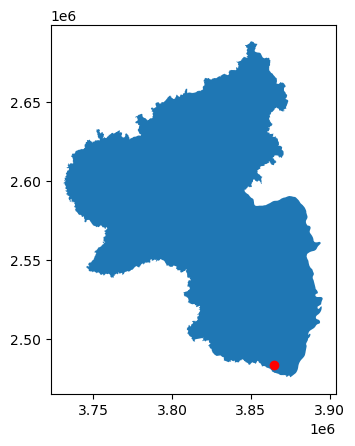

In [31]:
## Dieser Plot zeigt, dass der Standort der Grundwassermessstelle innerhalb der Landesgrenzen liegen 
## und die Transformation der Koordinaten funktioniert hat
fig,ax = plt.subplots(1,1)
base = RLP.plot(ax = ax)
gwl_points.plot(ax = base, color = "r")


### Modellierung - Random Forest 

Nun, da alle Daten vorbereitet sind, können wir durch einen Random Forest Algorithmus versuchen, die Grundwasserstände anhand der Temperatur und des Niederschlags zu simulieren, beziehungsweise vorherzusagen.

In [61]:
## Arbeitsverzeichnis zurücksetzen
os.chdir(pwd)

## Laden aller .csv-Dateien. Diese enthalten nun jeweils 5 Spalten (Nummer/Index, Datum, Temperatur, Niederschlag, Grundwasser) 
## und haben 835 Einträge (also 835 Wochen = 16 Jahre). 
## Jede Datei ist die Messreihe einer Grundwassermessstelle verknüpft mit den HYRAS-Daten des DWD an diesem Ort.
## In diesem Fall ist nur eine Datei vorhanden, weil nur eine Station modelliert wird.

csv_files = glob.glob('data/HYRAS_GWData_csv/*.csv') 



In [47]:
## Erstellen einer Liste, die alle Datensätze enthalten wird.
processed_samples = pd.DataFrame()

for file in csv_files:
    df = pd.read_csv(file, skipinitialspace=True).drop(['Unnamed: 0'], axis=1)
    
    ## Kombination aller Messreihen in einem data frame
    processed_samples = pd.concat([processed_samples,df], axis=0)

processed_samples

,Date,pr,tas,GWL
0,1990-01-01,0.400000,-0.500000,135.347500
1,1990-01-08,0.200000,0.585714,135.385000
2,1990-01-15,4.900000,4.328571,135.422500
3,1990-01-22,34.000000,6.028572,135.460000
4,1990-01-29,6.200000,6.357143,135.540000
...,...,...,...,...
830,2005-11-28,23.199999,2.500000,134.936667
831,2005-12-05,7.300000,3.257143,134.963333
832,2005-12-12,21.300000,3.100000,134.990000
833,2005-12-19,4.600000,2.557143,135.020000


In [48]:
## Prüfung auf leere Werte
processed_samples.isnull().sum()

Date    0
pr      0
tas     0
GWL     0
dtype: int64

Hier werden die Daten in Trainings- und Testdatensätze aufgeteilt. 20% der Daten werden als Testdaten benutzt, an den anderen 80% wird das Modell trainiert.

In [49]:
## Das Datum soll als Index fungieren.
processed_samples = processed_samples.set_index(pd.DatetimeIndex(processed_samples['Date']))
del processed_samples['Date']
processed_samples

,pr,tas,GWL
Date,,,
1990-01-01,0.400000,-0.500000,135.347500
1990-01-08,0.200000,0.585714,135.385000
1990-01-15,4.900000,4.328571,135.422500
1990-01-22,34.000000,6.028572,135.460000
1990-01-29,6.200000,6.357143,135.540000
...,...,...,...
2005-11-28,23.199999,2.500000,134.936667
2005-12-05,7.300000,3.257143,134.963333
2005-12-12,21.300000,3.100000,134.990000


Die erklärenden Variablen (features) und erklärte Variable werden benannt.

In [50]:
## features und Zielvariable werden getrennt
X = processed_samples.drop(columns=['GWL'])
y = processed_samples['GWL']

In [51]:
## Aufteilen in Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Trainieren des Modells

Eine Hyperparameter-Optimierung ermöglicht es, die besten Parameter für das Modell zu ermitteln. Es wird jede mögliche Kombination aus den gegebenen Parameter-Bereichen getestet, um das beste Ergebnis zu erzielen.

In [52]:
## Hyperparameter-Optimierung
from sklearn.model_selection import GridSearchCV
rfc = RandomForestRegressor(random_state=42)

param_grid = { 
    'n_estimators': [100,200,300, 400, 500, 600, 700],
    #'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,5,6,7],
#    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

best_params = CV_rfc.best_params_

best_params

{'max_depth': 4, 'n_estimators': 700}

Die optimalen Parameter sind also eine Anzahl von 700 Entscheidungsbäumen mit einer Tiefe von maximal 4 Knoten pro Entscheidungsbaum. 


In [53]:
## Initialwert und Anzahl der Bäume für den Random Forest festlegen
seed = 196

# RandomForest erstellen, X und y definieren und Modell trainieren mit ermittelten besten Parametern
model = RandomForestRegressor(n_estimators = best_params["n_estimators"], 
                              random_state = seed, 
                              max_features = 1.0,
                              min_samples_split = 2, 
                              min_samples_leaf = 1, 
                              max_depth = best_params["max_depth"])
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, n_estimators=700, random_state=196)

### Evaluierung des Modells

Hier werden Perfomance-Metriken ausgegeben, zunächst um die Leistungsfähigkeit des Modells in Hinsicht auf die Vorhersage der Grundwasserstände mit den Trainingsdaten zu prüfen, dann die gleichen Metriken für die Leistungsfähigkeit des Modells anhand der Testdaten:

In [54]:
## Mittelwert der quadrierten Residuen und erklärte Varianz ausgeben lassen
print(f"Mean of squared residuals: {model.score(X_train, y_train)}")
print(f"% Var explained: {model.score(X_train, y_train) * 100}")

Mean of squared residuals: 0.19545733855817826
% Var explained: 19.545733855817826


Für den Trainingsdatensatz beträgt der Mittelwert der quadrierten Residuen also 0,195. Dies ist kein besonders gutes Ergebnis, ermöglicht aber eine bessere Vorhersage als zufälliges Raten (oder einfach die Annahme des Mittelwertes)

In [55]:
## Mittelwert der quadrierten Residuen und erklärte Varianz ausgeben lassen
print(f"Mean of squared residuals: {model.score(X_test, y_test)}")
print(f"% Var explained: {model.score(X_test, y_test) * 100}")

Mean of squared residuals: -0.02049377548650555
% Var explained: -2.049377548650555


Für den Testdatensatz beträgt der Mittelwert der quadrierten Residuen -0,02. Dies ist ein schlechtes Ergebnis und ist keine Verbesserung gegenüber der Annahme des Mittelwerts.

In [60]:
scores = - cross_val_score(estimator=model, X=X_train, y=y_train, cv=10, scoring='neg_mean_squared_error', n_jobs=1)
print(scores)
print(np.mean(scores), np.std(scores))

scores = - cross_val_score(estimator=model, X=X_test, y=y_test, cv=10, scoring='neg_mean_squared_error', n_jobs=1)
print(scores)
print(np.mean(scores), np.std(scores))

[0.15382847 0.12457724 0.17206299 0.17783363 0.12464693 0.16002206
 0.13483773 0.15261859 0.17722317 0.13739399]
0.15150448018266865 0.01944173126089822
[0.14378217 0.19720647 0.14331656 0.26592559 0.17017654 0.19613762
 0.16782807 0.08170431 0.14147065 0.20740086]
0.17149488464626544 0.04692093883100013


Die Kreuzvalidierung zeigt eine relativ gute Stabilität des Modells gegenüber zufälliger Auswahl der Daten. Die Standardabweichung ist im Testdatensatz deutlich höher, was durch die kleinere Menge an Daten gut erklärbar ist (nur 20% des gesamten Datensatzes werden verwendet)

Zum Schluss sollen visuell die vorhergesagten und die realen Messwerte verglichen werden, einmal für den Trainingsdatensatz und einmal für den Testdatensatz, um zu überprüfen, ob das Modell gut generalisiert und damit man neben den Bewertungsmetriken auch einen visuellen Vergleich hat.

Für diesen Codechunk kam ChatGPT zum Einsatz, um eine Lösung für die Erstellung eines kombinierten DataFrames zu finden. 

In [57]:
## Modellvorhersagen werden getroffen und in Objekten gespeichert
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)


## Erstelle zunächst einen Dataframe, der die realen Werte und die Modellvorhersagen enthält, 
## und das Datum weiterhin als Index benutzt.
## Vorher müssen die Vorhersageergebnisse als pandas-Serie gespeichert werden.

y_pred_train_series = pd.Series(y_pred_train, index=y_train.index, name='y_val')
y_train_compare = pd.DataFrame({
    'y_train': y_train,
    'y_pred_train': y_pred_train_series
})


y_pred_test_series = pd.Series(y_pred_test, index=y_test.index, name='y_val')
y_test_compare = pd.DataFrame({
    'y_test': y_test,
    'y_pred_test': y_pred_test_series
})

# Optional: Ausgabe zur Überprüfung
print(y_train_compare.head())


            y_train  y_pred_train
Date                             
1999-03-01   136.06    135.579947
1996-08-19   135.17    135.312681
1998-11-09   135.33    135.557193
2003-03-31   135.88    135.599848
1995-10-16   135.54    135.405672


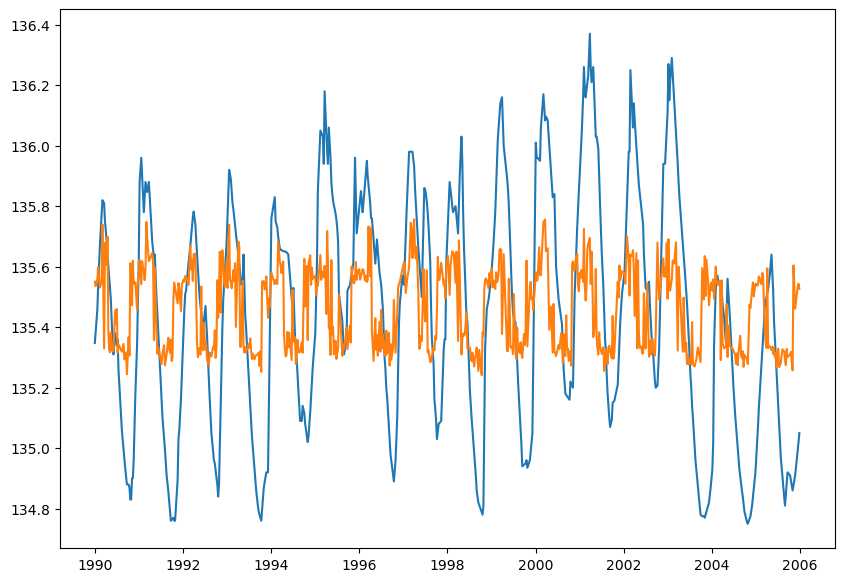

In [58]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (10,7))

plt.plot(y_train_compare.sort_index())
plt.show()

Abbildung 1:

In dem hier erstellten Plot sind die realen Messwerte des Trainingsdatensatzes in blau dargestellt, in orange sind die durch das Modell vorhergesagten Grundwasserstände sichtbar. Man kann erkennen, dass das Modell nicht gut darin ist, die Stärke der Peaks vorherzusehen, aber die periodische Schwankung des Grundwasserstands lässt sich trotzdem gut nachvollziehen.

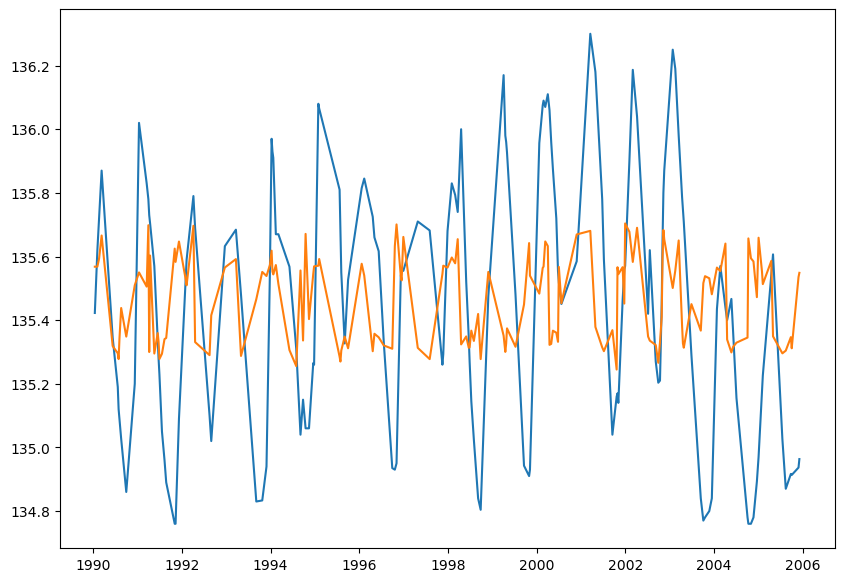

In [59]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (10,7))

plt.plot(y_test_compare.sort_index())
plt.show()

Abbildung 2:

In dem hier erstellten Plot sind die realen Messwerte des Testdatensatzes in blau dargestellt, in orange sind die durch das Modell vorhergesagten Grundwasserstände sichtbar. Man kann erkennen, dass das Modell häufig falsche Vorhersagen trifft, auch wenn die peaks meistens an einer ähnlichen Stelle sind.

### Ergebnisse

Die Hyperparameter-Optimierung des Random Forest Regressors ergab, dass die besten Modelleinstellungen eine maximale Tiefe der Bäume (max_depth) von 4 und 700 Bäume (n_estimators) umfassen. Mit diesen Parametern wurde das Modell trainiert, und die Leistung auf den Trainingsdaten zeigte eine erklärte Varianz von 19,55% sowie einen Mittelwert der quadrierten Residuen von 0,195. Diese Werte deuten darauf hin, dass das Modell auf den Trainingsdaten eine begrenzte Fähigkeit zur Vorhersage besitzt.
Die Bewertung des Modells mit den Testdaten zeigte jedoch eine negative erklärte Varianz von -2,05% und einen negativen Mittelwert der quadrierten Residuen von -0,0205. Diese Ergebnisse deuten auf eine Überanpassung des Modells an die Trainingsdaten hin und zeigen, dass das Modell auf den Testdaten schlechter abschneidet als ein einfaches Durchschnittsmodell.
Zur weiteren Überprüfung der Modellrobustheit wurde eine 10-fache Kreuzvalidierung durchgeführt. Die Ergebnisse auf den Trainingsdaten zeigten einen Mittelwert des negativen mittleren quadratischen Fehlers (MSE) von 0,1515 bei einer Standardabweichung von 0,0194. Im Vergleich dazu lag der Mittelwert des negativen MSE auf den Testdaten bei 0,1715 mit einer Standardabweichung von 0,0469. Diese Ergebnisse verdeutlichen eine höhere Variabilität und eine eingeschränkte Generalisierbarkeit des Modells auf neue Daten.
Zusammenfassend zeigt das Random Forest Modell auf den Trainingsdaten akzeptable Ergebnisse, weist jedoch auf den Testdaten erhebliche Schwächen auf, was auf eine Überanpassung oder unzureichende Modellanpassung an die Testdaten hindeutet. Dies lässt sich auch sehr gut in den Abbildungen 1 und 2 erkennen. In diesen Abbildungen zeigt sich außerdem, dass das Modell besonders ungeeignet ist, um die Maximal- und Minimalwerte des Grundwasserspiegels zu erfassen. 

### Schlussfolgerung

In dieser Arbeit wurde ein Random Forest Regressionsmodell zur Vorhersage des Grundwasserstands an einer Messstation in Rheinland-Pfalz entwickelt und optimiert.
Die Ergebnisse sind nur wenig zufriedenstellend. Die Leistungsfähigkeit des Modells könnte möglicherweise verbessert werden, indem weitere Variablen hinzugezogen werden oder die verwendeten Variablen optimiert werden. Zum Beispiel könnten Regenereignisse nicht nur zeitlich lokal betrachtet werden, sondern es wäre denkbar, dass ein gleitender Durchschnitt der Temperatur und des Niederschlags verwendet wird, um anhaltende Regen- und Trockenperioden zu erfassen. Weiterhin wäre eine Analyse über einen längeren Zeitraum sinnvoll, um zu untersuchen, ob das Modell in der Lage ist, lang- und mittelfristige Trends vorherzusagen. 
Zusammenfassend lässt sich sagen, dass, obwohl das Random Forest Modell in unserer Arbeit wertvolle Einsichten liefert, es in seiner Vorhersagekraft und Generalisierbarkeit mangelt. Zukünftige Arbeiten sollten daher in Betracht ziehen, zusätzliche relevante Variablen einzubeziehen und alternative Modellierungsansätze zu erforschen, um die Vorhersagegenauigkeit und Robustheit weiter zu verbessern.

### Quellen

Bierkens, M. and Wada, Y. (2019) ‘Non-renewable groundwater use and groundwater depletion: A review’, Environmental Research Letters, 14. Available at: https://doi.org/10.1088/1748-9326/ab1a5f.

DAS-Basisdienst - Hydrometeorologische Rasterdatensätze (2024). Available at: https://www.das-basisdienst.de/DAS-Basisdienst/DE/produkte/liste/hyras_node.html (Accessed: 26 August 2024).

Lee, S. and Lee, C.-W. (2015) ‘Application of Decision-Tree Model to Groundwater Productivity-Potential Mapping’, Sustainability, 7(10), pp. 13416–13432. Available at: https://doi.org/10.3390/su71013416.

OpenAI. (2024). ChatGPT [Large language model].

Pham, Q.B. et al. (2022) ‘Groundwater level prediction using machine learning algorithms in a drought-prone area’, Neural Computing and Applications, 34(13), pp. 10751–10773. Available at: https://doi.org/10.1007/s00521-022-07009-7.

Wunsch, A., Liesch, T. and Broda, S. (2022) ‘Deep learning shows declining groundwater levels in Germany until 2100 due to climate change’, Nature Communications, 13(1), p. 1221. Available at: https://doi.org/10.1038/s41467-022-28770-2.